## Using ML to Identify Dyslexia - Data Collection

**Team:**
* David Feldman
* Ping-Lun Wu

**Course:** AI 570– Deep Learning (Spring, 2024)


### Problem Statement

Dyslexia is a highly complicated neuro-developmental brain disorder characterized by sluggish and inaccurate word comprehension and phonological impairment, affecting about 5-17% of the general population in most global languages and cultures.

Early diagnosis of dyslexia is crucial in preventing lifelong problems. If dyslexia is undiagnosed, students will likely experience significant frustration and esteem issues in school. They are likely to be seen as low-performing students, hindering academic advancement and resulting in lost career options.

Our project aims to address challenges in the early detection of dyslexia by developing a machine-learning model designed to identify if an individual may possess a marker for it. Current methods often rely on subjective evaluations and are time-consuming or expensive brain scan tests. We aim to develop a more objective, efficient approach using a machine learning tool for dyslexia detection through handwriting analysis, which could provide a broader, more accurate assessment. 


### Notebook Description
* This is the "Deep Learning Model" part of the project
* A 2nd notebook will contain the Data Collection code to identify characters
This notebook will walk though and show the logic described in our report on how we approached the data pre-proccesing and model for the project.
    
This notebook will demonstrate our model that was based on research adopted a methodology inspired by the study "Development of CNN Transfer Learning for Dyslexia Handwriting Recognition" by Rosli et al., published in 2021. This paper guided our choice to adopt and enhance the classic LeNet-5 model architecture, known for its simplicity and effectiveness in image recognition tasks. Staying true to its original design principles, we maintained the convolutional layer depths of 6, 16, and 120, while utilizing 5x5 filters to capture the intricate patterns within handwriting samples. These modifications were poised to refine the feature extraction capabilities inherent in the LeNet-5 model, aligning it more closely with the requirements of handwriting recognition.
 
Building upon this framework, we specifically replaced the tanh activation function with ReLU, thereby accelerating training and mitigating the issue of vanishing gradients. In addition, we transitioned from average pooling to max pooling, which proved more adept at retaining critical feature information through the network's layers.
 
Furthermore, a comparative analysis between RMSprop and Adam optimizers led us to favor Adam for its slightly superior performance in our trials (validation accuracy: 0.9571 vs 0.9495), aligning with the findings in the literature. The decision to utilize Adam as our primary optimizer for this project stems from its ability to adapt learning rates based on a moving average of the gradient's magnitude, which allows for more refined adjustments during learning. Adam combines the advantages of two other extensions of stochastic gradient descent: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSprop), offering an optimizer that is both computationally efficient and well-suited for handling sparse gradients.

    
* **Keywords:** dyslexic identification, handwriting, LeNet-5
	

### Data used for this notebook
We used open sourced data containing the categorized writing samples from:
Sazanita, Iza. "Dyslexia Handwriting Dataset," 2021. https://www.kaggle.com/datasets/drizasazanitaisa/dyslexia-handwriting-dataset.

In addition we developed a 2nd Notebook that contains Data Collection routines to automate the collection of Handwritten samples

* Keywords: dyslexic writing samples, normal writing samples, reversed writing samples

### Required packages

pip install tensorflow Pillow scikit-learn

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

def plot_accuracy(his):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(his.history['accuracy']) + 1), his.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, len(his.history['val_accuracy']) + 1), his.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.6, 1)
    plt.legend(loc='lower right')
    plt.show()
    
    return

def plot_loss(his):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(his.history['loss']) + 1), his.history['loss'], label='Training Loss')
    plt.plot(range(1, len(his.history['val_loss']) + 1), his.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0, 1)
    plt.legend(loc='upper right')
    plt.show()    
    
    return

histories = {}
models = {}

### Data Preprocessing

* Enumerate and present the main steps you preformed in the data preprocessing
* Add your code and interpret the outcome of main steps/functions


In [3]:
batchsize = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

# Define the training generator using train_datagen
train_generator = train_datagen.flow_from_directory(
    'Gambo/train',
    target_size=(32, 32),
    batch_size=batchsize,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    shuffle = True,
    seed = 42,
)

# Define the validation generator using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    'Gambo/train',
    target_size=(32, 32),
    batch_size=batchsize,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    seed = 42,
)

Found 128902 images belonging to 3 classes.
Found 22747 images belonging to 3 classes.


### Methodology

1. Architecture Adaptation: Based on Rosli et al. (2021), modified the classic LeNet-5 architecture to suit handwriting recognition tasks:
* Retained layer depths of 6, 16, and 120 with 5x5 filters.
* Switched activation function from tanh to ReLU to reduce vanishing gradients and speed up training.
* Replaced average pooling with max pooling to enhance feature retention.
2. Optimizer Comparison:
* Evaluated RMSprop and Adam; chose Adam for its better performance.
* Adam is preferred for its ability to adapt learning rates based on the gradients' moving average, improving handling of sparse gradients.
3. Enhancements to Prevent Overfitting:
* Batch Normalization: Implemented to speed up convergence, increasing validation accuracy from 0.8743 to 0.9571.
* L2 Regularization: Though it slightly reduced training accuracy, it significantly improved validation accuracy from 0.9268 to 0.9467, demonstrating effectiveness in combating overfitting.

### Model Fitting and Validation

1. Choose for optimizer
2. Test for different activation
3. Test for using L2 regularization or not
4. Grid search for different hyperparameter

#### Choose for optimizer
First use the hyperparameter in the research by Rosli et al. to test for optimizer

##### RMS prop

Found 128902 images belonging to 3 classes.
Found 22747 images belonging to 3 classes.
Epoch 1/20


/Users/tonywu/Documents/Penn State Python/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4029/4029 ━━━━━━━━━━━━━━━━━━━━ 50s 12ms/step - accuracy: 0.8930 - loss: 0.4003 - val_accuracy: 0.8018 - val_loss: 0.6777
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.9607 - loss: 0.1994 - val_accuracy: 0.8793 - val_loss: 0.3998
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9661 - loss: 0.1759 - val_accuracy: 0.9033 - val_loss: 0.3420
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.9681 - loss: 0.1666 - val_accuracy: 0.8549 - val_loss: 0.4593
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9705 - loss: 0.1599 - val_accuracy: 0.8501 - val_loss: 0.5426
Epoch 6/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9719 - loss: 0.1551 - val_accuracy: 0.8959 - val_loss: 0.3632
Epoch 7/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9722 - loss: 0.1518 - val_accuracy: 0.9052 - val_loss: 0.3683
Epoch 8/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9728 - loss: 0.14

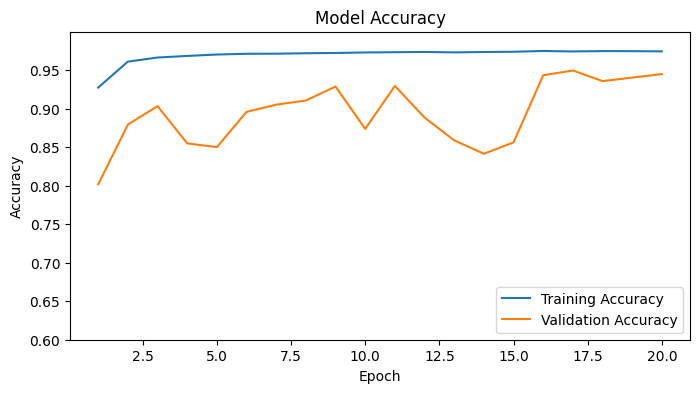

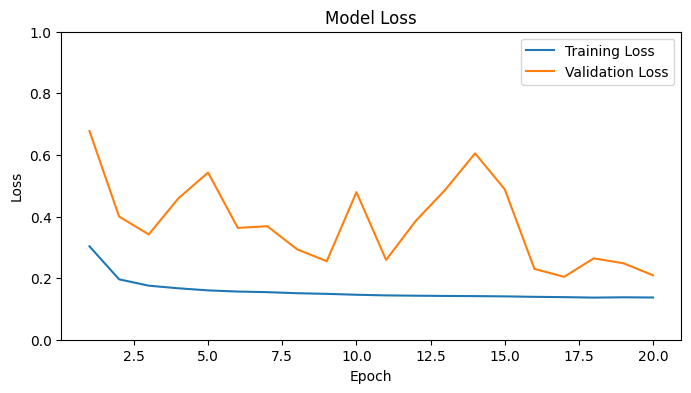

Best validation accuracy: 94.95%


In [ ]:
batchsize = 32
lr = 0.001
dropout = 0.1
l2_rate = 0.001

model = Sequential([
    Input(shape=(32, 32, 1)),
    
    Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(120, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    
    Dropout(dropout),
    
    Flatten(),
    Dense(84, activation='relu', kernel_regularizer=l2(l2_rate)),
    Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
])

model.compile(optimizer=RMSprop(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
    )

plot_accuracy(history)
plot_loss(history)

his_RMS = history
model_RMS = model

best_val_accuracy = max(history.history['val_accuracy'])
print("Best validation accuracy: {:.2f}%".format(best_val_accuracy * 100))

##### Adam

Found 128902 images belonging to 3 classes.
Found 22747 images belonging to 3 classes.
Epoch 1/20


/Users/tonywu/Documents/Penn State Python/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4029/4029 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.8929 - loss: 0.4054 - val_accuracy: 0.8546 - val_loss: 0.4618
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9601 - loss: 0.2058 - val_accuracy: 0.8465 - val_loss: 0.5009
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9671 - loss: 0.1849 - val_accuracy: 0.8828 - val_loss: 0.3966
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9695 - loss: 0.1714 - val_accuracy: 0.9297 - val_loss: 0.2703
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.9731 - loss: 0.1621 - val_accuracy: 0.8926 - val_loss: 0.3899
Epoch 6/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9749 - loss: 0.1551 - val_accuracy: 0.9166 - val_loss: 0.3045
Epoch 7/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9744 - loss: 0.1542 - val_accuracy: 0.8617 - val_loss: 0.4973
Epoch 8/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9756 - loss: 0.14

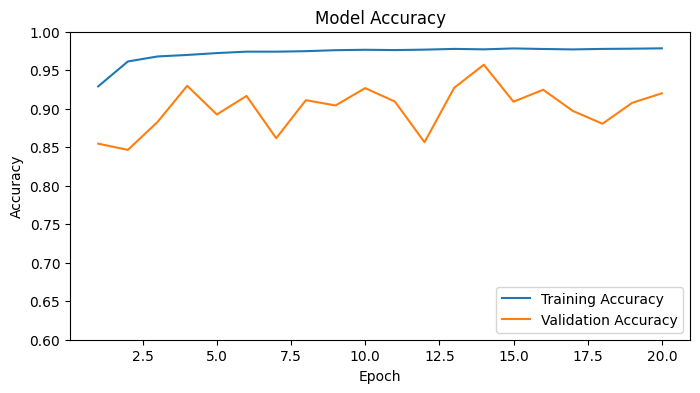

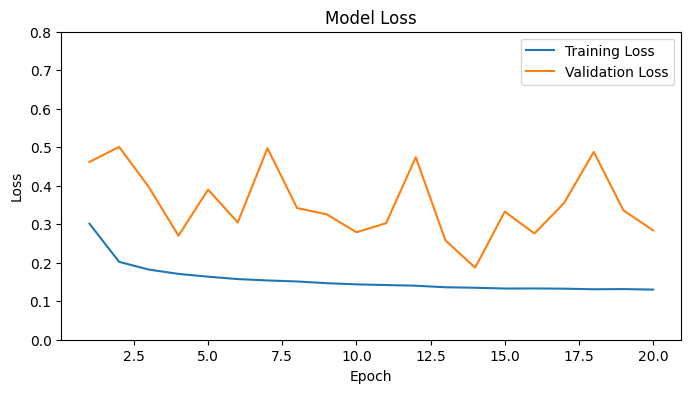

In [ ]:
batchsize = 32
lr = 0.001
dropout = 0.1
l2_rate = 0.001

model = Sequential([
    Input(shape=(32, 32, 1)),
    
    Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(120, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    
    Dropout(dropout),
    
    Flatten(),
    Dense(84, activation='relu', kernel_regularizer=l2(l2_rate)),
    Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
])

model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
    )

plot_accuracy(history)
plot_loss(history)

history_Adam = history
model_Adam = model

In [ ]:
best_val_accuracy = max(history_lr_0001.history['val_accuracy'])
print("Best validation accuracy: {:.2f}%".format(best_val_accuracy * 100))

Best validation accuracy: 95.71%


##### Conclusion: 
Adam (val_acc = 0.9571) performs slightly better than RMSprop (val_acc = 0.9495)

#### Test for different activation (other than relu)

##### tanh

In [ ]:
lr = 0.001
dropout = 0.1
l2_rate = 0.001

model = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(6, (5, 5), activation='tanh', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(16, (5, 5), activation='tanh', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(120, (5, 5), activation='tanh', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),

    Dropout(dropout),

    Flatten(),
    Dense(84, activation='tanh', kernel_regularizer=l2(l2_rate)),
    Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
])

model.compile(optimizer=Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

histories['tanh'] = history
models['tanh'] = model
best_val_acc = max(history.history['val_accuracy'])
print(f"Best validation accuracy for tanh: {best_val_acc:.4f}")


Epoch 1/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 63s 14ms/step - accuracy: 0.8861 - loss: 0.4157 - precision_47: 0.8942 - recall_47: 0.8767 - val_accuracy: 0.7865 - val_loss: 0.6768 - val_precision_47: 0.7891 - val_recall_47: 0.7829
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.9529 - loss: 0.2238 - precision_47: 0.9548 - recall_47: 0.9510 - val_accuracy: 0.8709 - val_loss: 0.4134 - val_precision_47: 0.8754 - val_recall_47: 0.8644
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - accuracy: 0.9605 - loss: 0.2014 - precision_47: 0.9620 - recall_47: 0.9592 - val_accuracy: 0.9163 - val_loss: 0.3084 - val_precision_47: 0.9176 - val_recall_47: 0.9148
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9648 - loss: 0.1928 - precision_47: 0.9659 - recall_47: 0.9637 - val_accuracy: 0.9057 - val_loss: 0.3425 - val_precision_47: 0.9074 - val_recall_47: 0.9039
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.9668 - loss: 0.1841 - prec

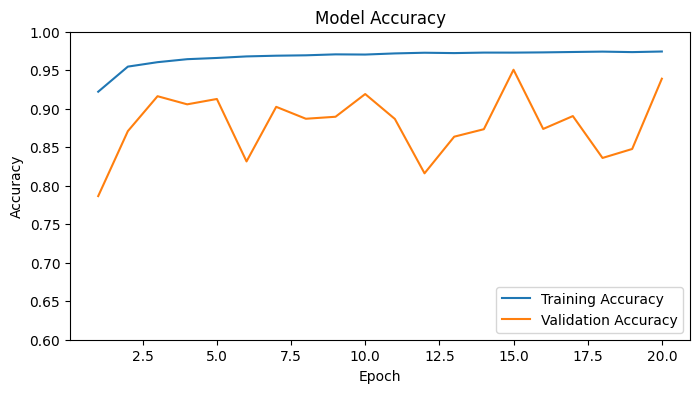

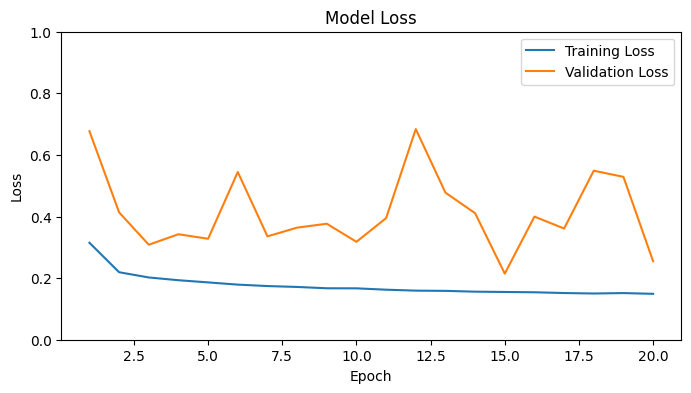

In [ ]:
plot_accuracy(histories['tanh'])
plot_loss(histories['tanh'])

##### Conclusion:
ReLU (val_acc = 0.9571) performs slightly better than tanh (val_acc = 0.9506)

#### Test for using L2 or not

##### with l2

Epoch 1/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.8945 - loss: 0.3988 - precision_50: 0.9027 - recall_50: 0.8857 - val_accuracy: 0.7919 - val_loss: 0.6270 - val_precision_50: 0.7945 - val_recall_50: 0.7890
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.9569 - loss: 0.2101 - precision_50: 0.9586 - recall_50: 0.9554 - val_accuracy: 0.8241 - val_loss: 0.6020 - val_precision_50: 0.8266 - val_recall_50: 0.8213
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.9653 - loss: 0.1897 - precision_50: 0.9664 - recall_50: 0.9643 - val_accuracy: 0.9090 - val_loss: 0.3236 - val_precision_50: 0.9108 - val_recall_50: 0.9060
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9672 - loss: 0.1808 - precision_50: 0.9682 - recall_50: 0.9663 - val_accuracy: 0.8910 - val_loss: 0.3695 - val_precision_50: 0.8948 - val_recall_50: 0.8868
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9701 - loss: 0.1721 - prec

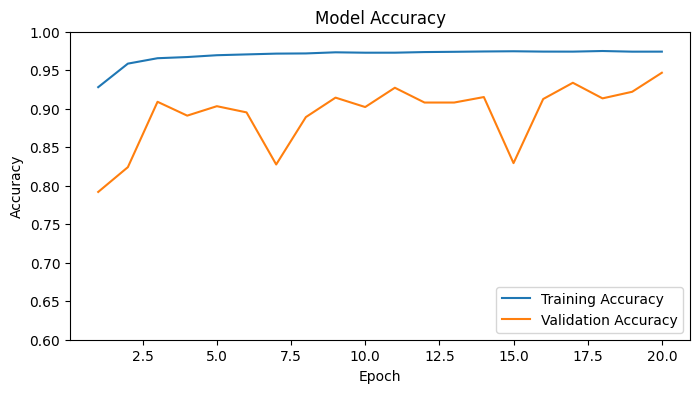

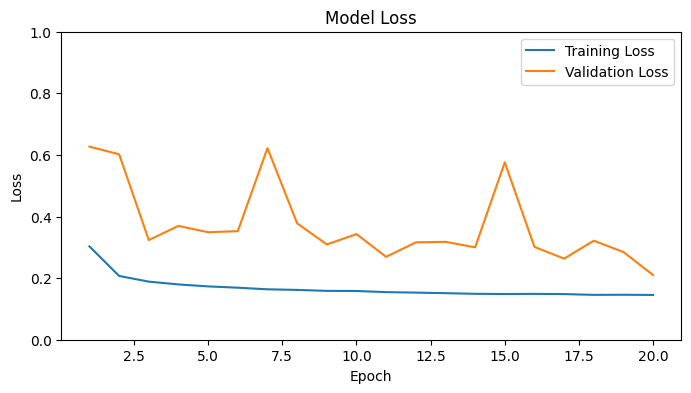

Best validation accuracy for model with l2: 0.9467


In [47]:
lr = 0.001
dropout = 0.1
l2_rate = 0.001

model = Sequential([
    Input(shape=(32, 32, 1)),
    Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(120, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),

    Dropout(dropout),

    Flatten(),
    Dense(84, activation='tanh', kernel_regularizer=l2(l2_rate)),
    Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
])

model.compile(optimizer=Adam(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy', Precision(), Recall()])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

histories['l2'] = history
models['l2'] = model

plot_accuracy(history)
plot_loss(history)

best_val_acc = max(histories['l2'].history['val_accuracy'])
print(f"Best validation accuracy for model with l2: {best_val_acc:.4f}")

##### without l2

Epoch 1/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 53s 12ms/step - accuracy: 0.8940 - loss: 0.2776 - precision_49: 0.9057 - recall_49: 0.8824 - val_accuracy: 0.8161 - val_loss: 0.5178 - val_precision_49: 0.8194 - val_recall_49: 0.8125
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9643 - loss: 0.0984 - precision_49: 0.9657 - recall_49: 0.9631 - val_accuracy: 0.8262 - val_loss: 0.6613 - val_precision_49: 0.8279 - val_recall_49: 0.8239
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9764 - loss: 0.0677 - precision_49: 0.9770 - recall_49: 0.9759 - val_accuracy: 0.9268 - val_loss: 0.2069 - val_precision_49: 0.9277 - val_recall_49: 0.9258
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.9813 - loss: 0.0537 - precision_49: 0.9818 - recall_49: 0.9808 - val_accuracy: 0.8772 - val_loss: 0.4028 - val_precision_49: 0.8786 - val_recall_49: 0.8753
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 44s 11ms/step - accuracy: 0.9845 - loss: 0.0448 - prec

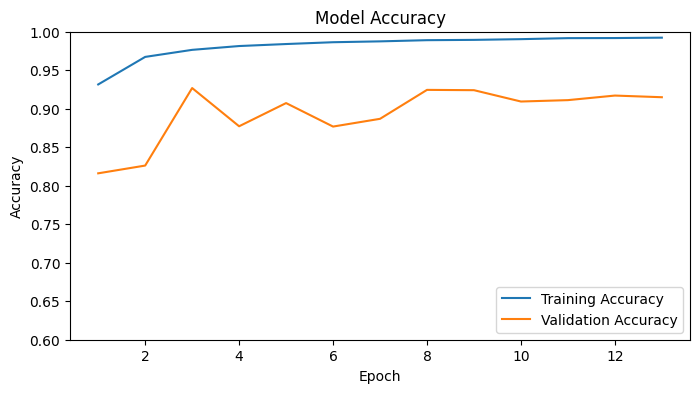

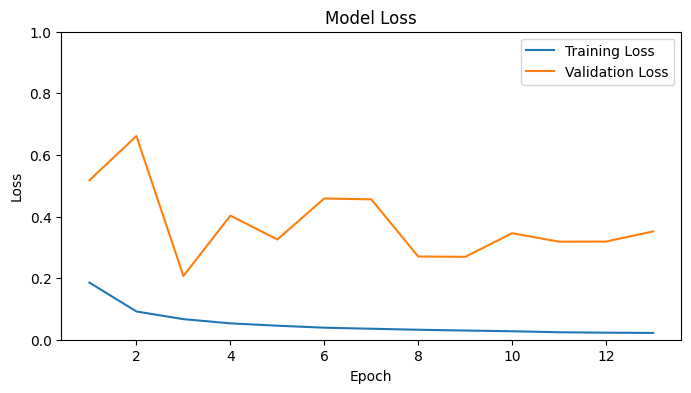

Best validation accuracy for model without l2: 0.9268


In [46]:
lr = 0.001
dropout = 0.1

model = Sequential([
    Input(shape=(32, 32, 1)),

    Conv2D(6, (5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(16, (5, 5), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(120, (5, 5), activation='relu'),
    BatchNormalization(),
    
    Dropout(dropout),
    
    Flatten(),
    Dense(84, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks = early_stopping
    )

histories['without_l2'] = history
models['without_l2'] = model    

plot_accuracy(histories['without_l2'])
plot_loss(histories['without_l2'])

best_val_acc = max(histories['without_l2'].history['val_accuracy'])
print(f"Best validation accuracy for model without l2: {best_val_acc:.4f}")

##### Conclusion:
* While model without l2 has a better train accuracy (0.9928) than model with l2 (0.9746).
* Model with l2 performs better on validation accuracy (0.9467) than model without l2 (0.9268).
* This indicates that L2 regularization helps to prevent overfitting, enhancing the model's ability to perform well on unseen data.

#### Test for different hyperparameter
##### grid search for lr, dropout

In [26]:
learning_rates = [0.01, 0.001, 0.0001]
dropout_rates = [0, 0.1, 0.3]
l2_rates = [0.001]

for lr in learning_rates:
    for dropout in dropout_rates:
        for l2_rate in l2_rates:
            model = Sequential([
                Input(shape=(32, 32, 1)),
                Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
                BatchNormalization(),
                MaxPooling2D((2, 2)),

                Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
                BatchNormalization(),
                MaxPooling2D((2, 2)),

                Conv2D(120, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
                BatchNormalization(),

                Dropout(dropout),

                Flatten(),
                Dense(84, activation='relu', kernel_regularizer=l2(l2_rate)),
                Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
            ])

            model.compile(optimizer=Adam(learning_rate=lr),
                          loss='categorical_crossentropy',
                          metrics=['accuracy', Precision(), Recall()])

            early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

            history = model.fit(
                train_generator,
                epochs=20,
                validation_data=validation_generator,
                callbacks=[early_stopping]
            )

            key = f'lr_{lr}_dropout_{dropout}_l2_{l2_rate}'
            histories[key] = history
            models[key] = model
            best_val_acc = max(history.history['val_accuracy'])
            print(f"Best validation accuracy for lr={lr}, dropout={dropout}, l2_rate={l2_rate}: {best_val_acc:.4f}")


Epoch 1/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8698 - loss: 0.5832 - precision_38: 0.8813 - recall_38: 0.8583 - val_accuracy: 0.8270 - val_loss: 0.5925 - val_precision_38: 0.8331 - val_recall_38: 0.8191
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9105 - loss: 0.4072 - precision_38: 0.9149 - recall_38: 0.9058 - val_accuracy: 0.7506 - val_loss: 0.7365 - val_precision_38: 0.7579 - val_recall_38: 0.7385
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9149 - loss: 0.3664 - precision_38: 0.9188 - recall_38: 0.9107 - val_accuracy: 0.8635 - val_loss: 0.4848 - val_precision_38: 0.8695 - val_recall_38: 0.8568
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9188 - loss: 0.3428 - precision_38: 0.9233 - recall_38: 0.9143 - val_accuracy: 0.6154 - val_loss: 1.2809 - val_precision_38: 0.6206 - val_recall_38: 0.6079
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.9191 - loss: 0.3403 - prec

In [40]:
for lr in learning_rates:
    for dropout in dropout_rates:
        for l2_rate in l2_rates:
            key = f'lr_{lr}_dropout_{dropout}_l2_{l2_rate}'
            best_train_acc = max(histories[key].history['accuracy'])
            best_val_acc = max(histories[key].history['val_accuracy'])
            print(f"Best training accuracy for lr={lr}, dropout={dropout}, l2_rate={l2_rate}: {best_train_acc:.4f}")
            print(f"Best validation accuracy for lr={lr}, dropout={dropout}, l2_rate={l2_rate}: {best_val_acc:.4f}\n")

Best training accuracy for lr=0.01, dropout=0, l2_rate=0.001: 0.9211
Best validation accuracy for lr=0.01, dropout=0, l2_rate=0.001: 0.8861

Best training accuracy for lr=0.01, dropout=0.1, l2_rate=0.001: 0.9132
Best validation accuracy for lr=0.01, dropout=0.1, l2_rate=0.001: 0.8825

Best training accuracy for lr=0.01, dropout=0.3, l2_rate=0.001: 0.9029
Best validation accuracy for lr=0.01, dropout=0.3, l2_rate=0.001: 0.8836

Best training accuracy for lr=0.001, dropout=0, l2_rate=0.001: 0.9792
Best validation accuracy for lr=0.001, dropout=0, l2_rate=0.001: 0.9174

Best training accuracy for lr=0.001, dropout=0.1, l2_rate=0.001: 0.9763
Best validation accuracy for lr=0.001, dropout=0.1, l2_rate=0.001: 0.9311

Best training accuracy for lr=0.001, dropout=0.3, l2_rate=0.001: 0.9713
Best validation accuracy for lr=0.001, dropout=0.3, l2_rate=0.001: 0.9173

Best training accuracy for lr=0.0001, dropout=0, l2_rate=0.001: 0.9925
Best validation accuracy for lr=0.0001, dropout=0, l2_rate=0.

##### Conclusion:
learning rate = 0.001, dropout = 0.1, l2_rate = 0.001 combination has the best performance (val_acc = 0.9311)

In [ ]:
lr = 0.001
dropout = 0.1
l2_rate = 0.001

model = Sequential([
    Input(shape=(32, 32, 1)),
    
    Conv2D(6, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(16, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(120, (5, 5), activation='relu', kernel_regularizer=l2(l2_rate)),
    BatchNormalization(),
    
    Dropout(dropout),
    
    Flatten(),
    Dense(84, activation='relu', kernel_regularizer=l2(l2_rate)),
    Dense(3, activation='softmax', kernel_regularizer=l2(l2_rate))
])

model.compile(optimizer=Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks = early_stopping
    )

histories['final'] = history
models['fianl'] = model    

Epoch 1/20
  13/4029 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.5059 - loss: 1.1850 - precision: 0.5466 - recall: 0.4160 

/Users/tonywu/Documents/Penn State Python/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4029/4029 ━━━━━━━━━━━━━━━━━━━━ 59s 14ms/step - accuracy: 0.8912 - loss: 0.4025 - precision: 0.9012 - recall: 0.8798 - val_accuracy: 0.7960 - val_loss: 0.6667 - val_precision: 0.7991 - val_recall: 0.7932
Epoch 2/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.9591 - loss: 0.2111 - precision: 0.9608 - recall: 0.9570 - val_accuracy: 0.8567 - val_loss: 0.5277 - val_precision: 0.8606 - val_recall: 0.8525
Epoch 3/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 47s 12ms/step - accuracy: 0.9653 - loss: 0.1887 - precision: 0.9668 - recall: 0.9639 - val_accuracy: 0.9273 - val_loss: 0.2699 - val_precision: 0.9313 - val_recall: 0.9236
Epoch 4/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9684 - loss: 0.1757 - precision: 0.9695 - recall: 0.9672 - val_accuracy: 0.8957 - val_loss: 0.3633 - val_precision: 0.9004 - val_recall: 0.8906
Epoch 5/20
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.9706 - loss: 0.1696 - precision: 0.9719 - recall: 0.9696 - val_accuracy: 0.9288 - val

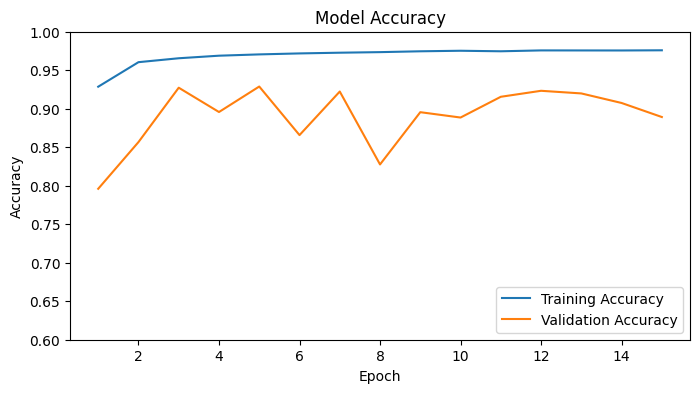

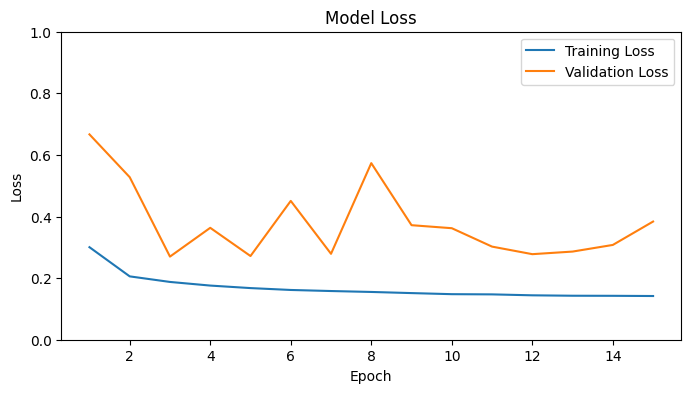

In [ ]:
plot_accuracy(history)
plot_loss(history)

### Model Evaluation 

* Examine your models (coefficients, parameters, errors, etc...)

* Compute and interpret your results in terms of accuracy, precision, recall, ROC etc. 

In [15]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 28, 28, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 10, 10, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 1, 1, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 1, 1, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,471 (720.59 KB)

 Trainable params: 61,395 (239.82 KB)

 Non-trainable params: 284 (1.11 KB)

 Optimizer params: 122,792 (479.66 KB)

In [ ]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Gambo/test',
    target_size=(32, 32),
    batch_size=batchsize,
    color_mode='grayscale',
    class_mode='categorical')

In [59]:
# Evaluate the model on the test set
results = models['final'].evaluate(test_generator)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
print("Test Precision:", results[2])
print("Test Recall:", results[3])

1773/1773 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8700 - loss: 0.5009 - precision: 0.8729 - recall: 0.8676
Test Loss: 0.5015929341316223
Test Accuracy: 0.8705816268920898
Test Precision: 0.873306155204773
Test Recall: 0.8680253028869629


In [62]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Fetch test data and true labels
test_data, test_labels = next(test_generator)
predictions = models['final'].predict(test_data)

# Compute ROC AUC for each class
roc_auc = roc_auc_score(test_labels, predictions, multi_class='ovo', average='macro')
print("ROC AUC Score:", roc_auc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ROC AUC Score: 0.9893939393939394


### Issues / Improvements
1. Dataset is very small
2. Use regularization / initialization
3. Use cross-validaiton
4. ...

###  References
Sazanita, Iza. "Dyslexia Handwriting Dataset," 2021. https://www.kaggle.com/datasets/drizasazanitaisa/dyslexia-handwriting-dataset.
	

### Credits

Rosli, Mohamed Syazwan Asyraf Bin, Iza Sazanita Isa, Siti Azura Ramlan, Siti Noraini Sulaiman, and Mohd Ikmal Fitri Maruzuki. "Development of CNN Transfer Learning for Dyslexia Handwriting Recognition." In 2021 11th IEEE International Conference on Control System, Computing and Engineering (ICCSCE), 194–99, 2021. https://doi.org/10.1109/ICCSCE52189.2021.9530971.

In [7]:
# End of Project